## Telco Customer Churn Project

In [38]:
# libraries to handle the data 
import numpy as np
import pandas as pd
# Libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# pipeline
from sklearn.pipeline import Pipeline

# metrics for checking how well the models are performing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score


## Load Dataset by with the help of pandas library

In [39]:
df = pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [40]:
print("Top 5 Rows of the dataset are ")
df.head()

Top 5 Rows of the dataset are 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
print("Last 5 Rows of the dataset are: ")
df.tail()

Last 5 Rows of the dataset are: 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [42]:
print("Columns of the dataset are: ")
df.columns

Columns of the dataset are: 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EDA (Expolatory Data Analysis)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


. By using info function we can see the count of columns and rows. 
. we can also see the data type of the columns and also know about the missing values or rows.
. Our dataset contains 21 columns and 7043 rows.
. totalcharges is the numerical column but it shows object

In [44]:
# convert totalcharges into numberic
df ['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [45]:
# drop missing values
df.dropna(inplace = True)

# drop customerId column
df.drop(columns = 'customerID',inplace= True,axis=1)

## Summary of numerical columns

In [46]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Unique values in columns

In [47]:
for column in df.columns:
    if df[column].dtype !='int64' and df[column].dtype != 'float64':
      print(f"{column}: {df[column].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## Check missing values 


In [48]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Visualization of the data 

## Churn by Tenure

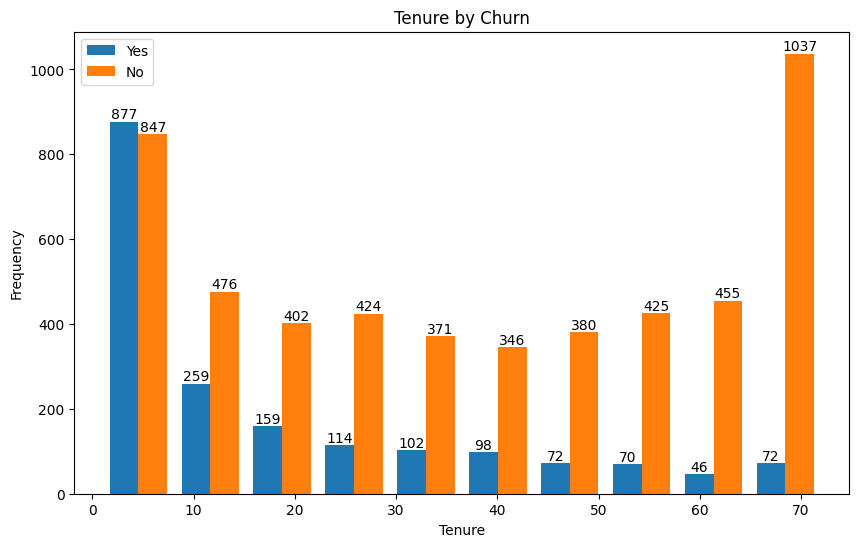

In [50]:
churned = df[df['Churn']=='Yes']
not_churned = df[df['Churn']=='No']

plt.figure(figsize=(10,6))
ax = plt.hist([churned['tenure'],not_churned['tenure']],bins=10,label=['Yes','No'])
plt.title("Tenure by Churn")
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Churn by TotalCharges

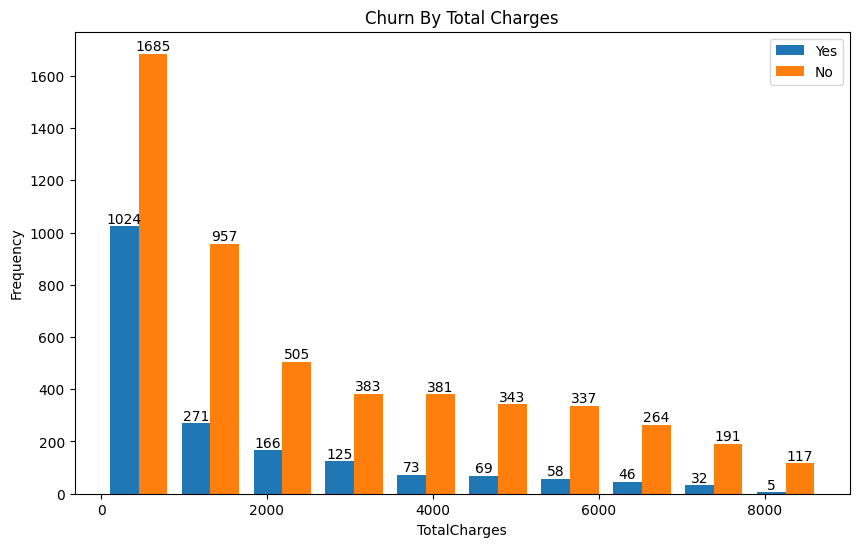

In [51]:
churned = df[df['Churn']=='Yes']
Not_churned = df[df['Churn']=='No']


plt.figure(figsize=(10,6))
ax = plt.hist([churned['TotalCharges'],Not_churned['TotalCharges']],bins=10,label=['Yes','No'])
plt.title("Churn By Total Charges")
plt.xlabel("TotalCharges")
plt.ylabel('Frequency')
plt.legend()

# adding values on the bar
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container)

plt.show()    
    

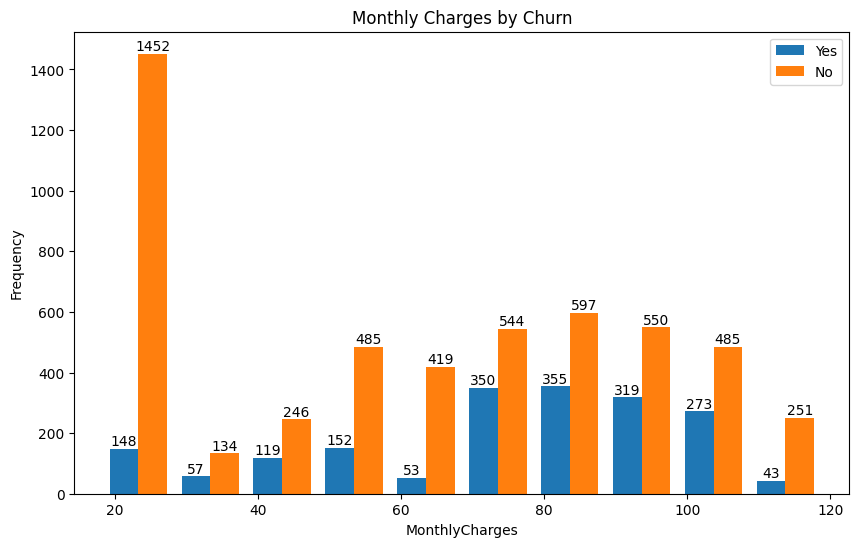

In [52]:
churned = df[df['Churn']=='Yes']
Not_churned = df[df['Churn']=='No']

plt.figure(figsize=(10,6))
ax = plt.hist([churned['MonthlyCharges'],Not_churned['MonthlyCharges']],bins = 10,label=['Yes','No'])
plt.title("Monthly Charges by Churn")
plt.xlabel('MonthlyCharges')
plt.ylabel("Frequency")
plt.legend()

# set values on the top of bars

ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i)
    
plt.show()    

## Machine Learning

Encoding categorical features into numerical features

In [53]:
# Extract categorical features 
categorical_features = df.select_dtypes(include = ['category','object']).columns
categorical_features


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

## Apply OneHotEncoding 

In [54]:
enoder = OneHotEncoder(sparse=False,drop='first')# setting drop=True to avoid multicolinearity problems

encoded_data = enoder.fit_transform(df[categorical_features]) # it return numpy arrray

# convert numpy array to pandas data frame 

encoded_df = pd.DataFrame(encoded_data,columns = enoder.get_feature_names_out(categorical_features))

# drop original categorical features from the original data frame

df.drop(columns=categorical_features,inplace = True)
df.reset_index(drop=True,inplace=True)

# concatenate the original data frame with encoded data frame
df  = pd.concat([df,encoded_df],axis=1)

In [55]:
df.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [56]:
df.rename(columns={"Churn_Yes":"Churn"},inplace=True)

In [57]:
df.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Split the data

In [58]:
X = df.drop(columns='Churn',axis=1)
y = df['Churn']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

## Machine Learning Models

In [61]:

# Define models and hyperparameters
models = {
    'Random Forest': (RandomForestClassifier(random_state=42),
                      {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20]}),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42),
                          {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.05, 0.1, 0.5]}),
    'SVM': (SVC(random_state=42, class_weight='balanced'),
            {'model__C': [0.1, 1, 10], 'model__gamma': ['scale', 'auto']}), 
    'Logistic Regression': (LogisticRegression(random_state=42, class_weight='balanced'),
                            {'model__C': [0.1, 1, 10], 'model__penalty': ['l2', 'l1'], 'model__solver': ['liblinear']}),
    'KNN': (KNeighborsClassifier(),
            {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance']}),
    'Decision Tree': (DecisionTreeClassifier(random_state=42),
                      {'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5, 10]}),
    'Ada Boost': (AdaBoostClassifier(random_state=42),
                  {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.05, 0.1, 0.5]}),
    'XG Boost': (XGBClassifier(random_state=42),
                 {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.05, 0.1, 0.5]})
}

# Store model performance
model_scores = []

# Evaluate each model
for name, (model, param_grid) in models.items():
    # Define a pipeline with scaling and model
    pipeline = Pipeline([
        ('scale', MinMaxScaler()),  # Apply scaling
        ('model', model)           # Add model
    ])
    
    # Perform GridSearchCV if hyperparameters are provided
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_pipeline = grid_search.best_estimator_  # Best pipeline
    else:
        pipeline.fit(X_train, y_train)
        best_pipeline = pipeline  # Use the default pipeline
    
    # Evaluate the model
    y_pred = best_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    model_scores.append({'Model': name, 'Accuracy': accuracy})
    print(f"Model: {name}, Test Accuracy: {accuracy * 100:.2f}%")

# Summary of model scores
scores_df = pd.DataFrame(model_scores)
print("\nSummary:")
print(scores_df.sort_values(by='Accuracy', ascending=False))


Model: Random Forest, Test Accuracy: 79.18%
Model: Gradient Boosting, Test Accuracy: 79.82%
Model: SVM, Test Accuracy: 73.13%
Model: Logistic Regression, Test Accuracy: 72.85%
Model: KNN, Test Accuracy: 75.27%
Model: Decision Tree, Test Accuracy: 74.56%
Model: Ada Boost, Test Accuracy: 79.18%
Model: XG Boost, Test Accuracy: 79.89%

Summary:
                 Model  Accuracy
7             XG Boost  0.798863
1    Gradient Boosting  0.798152
0        Random Forest  0.791756
6            Ada Boost  0.791756
4                  KNN  0.752665
5        Decision Tree  0.745558
2                  SVM  0.731343
3  Logistic Regression  0.728500


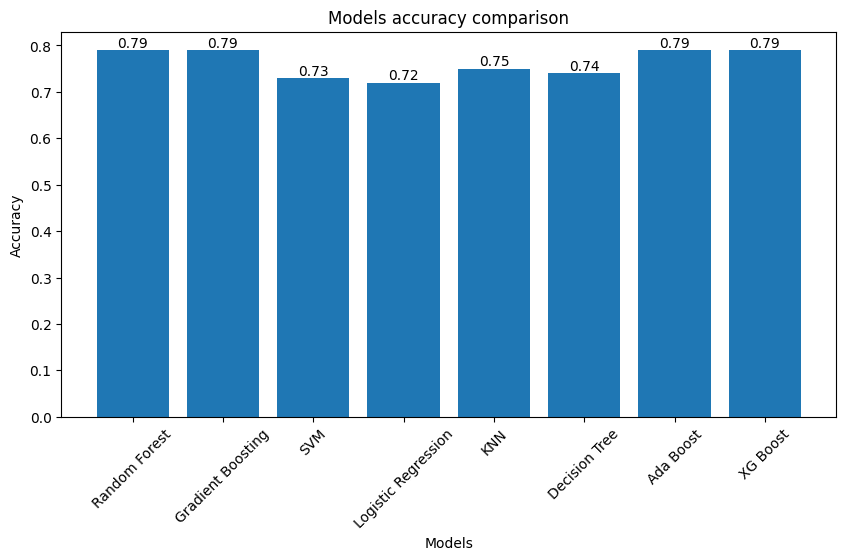

In [80]:
scores_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Ada Boost', 'XG Boost'],
    'Accuracy': [0.79, 0.79, 0.73, 0.72, 0.75, 0.74, 0.79, 0.79]
})

plt.figure(figsize=(10,5))
ax= plt.bar(scores_df['Model'],scores_df['Accuracy'])
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Models accuracy comparison")
plt.xticks(rotation=45)
plt.show()


## Imbalanced data

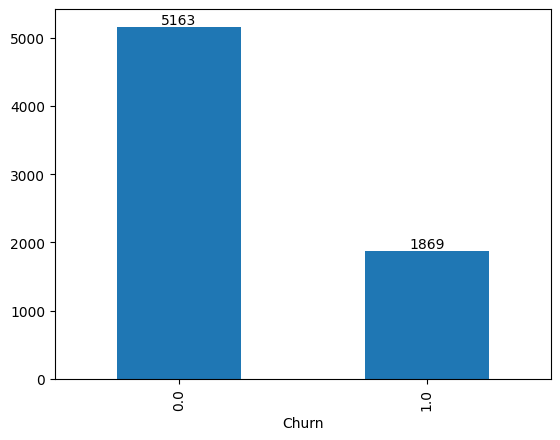

In [64]:
ax = df['Churn'].value_counts().plot(kind= 'bar')
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)

This shows it is a imbalanced data . we have to use upsampling

In [70]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6), 
         'learning_rate': uniform(0.01, 0.2),  
         'n_estimators': randint(100, 300),  
         'subsample': uniform(0.8, 0.2)}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(Xr_train, yr_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2), "%")

Model: Random Forest
Test Accuracy: 0.958 %

Model: Gradient Boosting
Test Accuracy: 0.956 %

Model: Support Vector Machine
Test Accuracy: 0.977 %

Model: Logistic Regression
Test Accuracy: 0.916 %

Model: K-Nearest Neighbors
Test Accuracy: 0.985 %

Model: Decision Tree
Test Accuracy: 0.939 %

Model: Ada Boost
Test Accuracy: 0.96 %

Model: XG Boost
Test Accuracy: 0.959 %

Model: Naive Bayes
Test Accuracy: 0.883 %

Best Model:
Test Accuracy: 0.9845626072041166
Model Pipeline: KNeighborsClassifier(n_neighbors=3, weights='distance') with accuracy 0.98 %


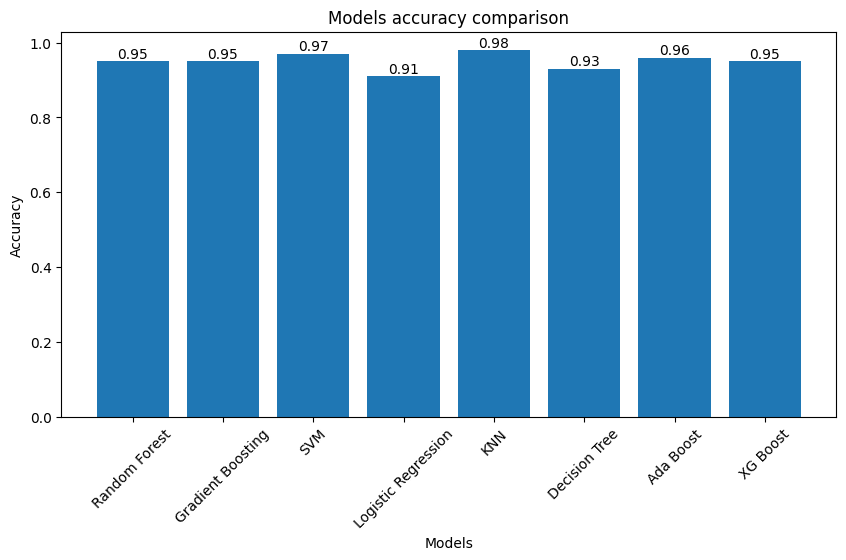

In [79]:
scores_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Ada Boost', 'XG Boost'],
    'Accuracy': [0.95, 0.95, 0.97, 0.91, 0.98, 0.93, 0.96, 0.95]
})

plt.figure(figsize=(10,5))
ax= plt.bar(scores_df['Model'],scores_df['Accuracy'])
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Models accuracy comparison")
plt.xticks(rotation=45)
plt.show()
